## Preprocessing

In [ ]:
!nvidia-smi

Wed Feb  7 07:33:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


In [ ]:
!pip show torch

Name: torch
Version: 2.1.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()

## Install Grounding DINO

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 421 (delta 144), reused 126 (delta 126), pack-reused 232
Receiving objects: 100% (421/421), 12.85 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (216/216), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Test Image for Grounding DINO

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


7


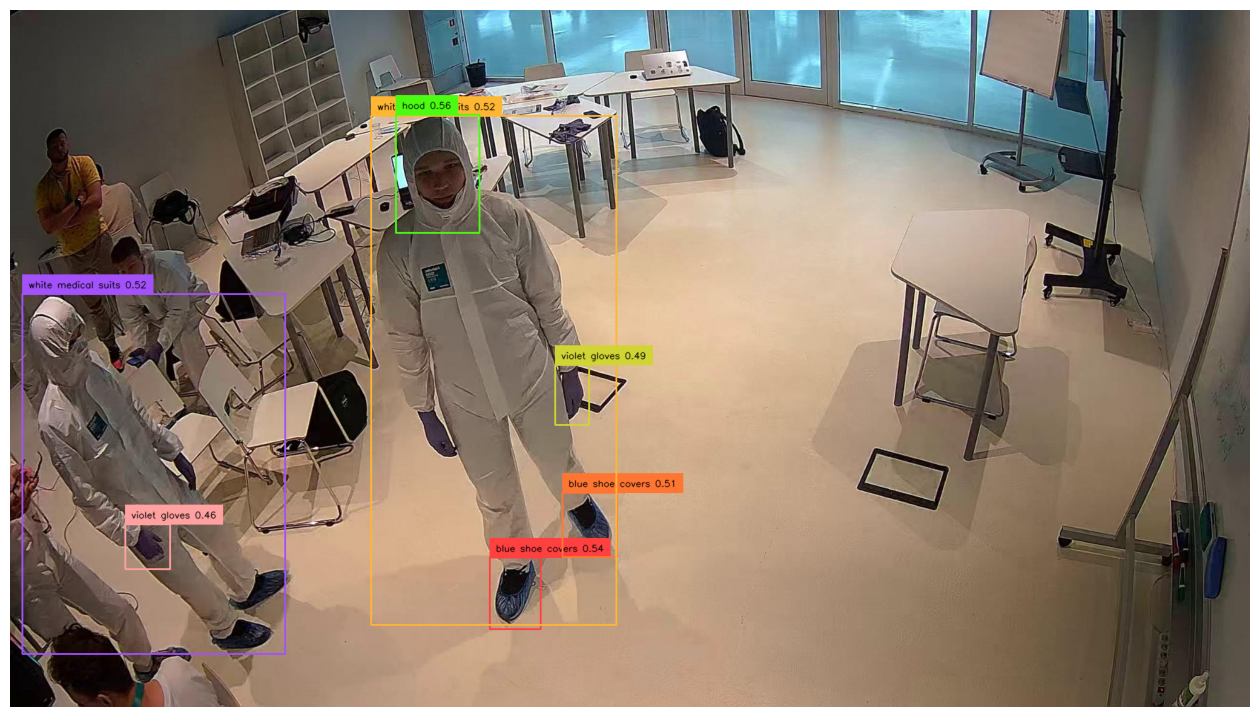

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "/content/drive/MyDrive/Coding/sirius_SIZ/test_images/test3.jpg"
IMAGE_PATH = os.path.join(HOME, IMAGE_NAME)

TEXT_PROMPT = "glasses, violet gloves, hood, white masks, white medical suits, blue shoe covers"
BOX_TRESHOLD = 0.45
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

print(len(boxes))
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

# Get mAP metrics

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 11.2 MB/s eta 0:00:00


In [ ]:
from torch import tensor
from torchmetrics.detection import MeanAveragePrecision


def change_vals(x_cen, y_cen, width, height, w, h):
    x_cen_p = x_cen * w
    y_cen_p = y_cen * h
    width_p = w * width
    height_p = h * height

    x1 = x_cen_p - (width_p // 2)
    y1 = y_cen_p - (height_p // 2)
    x2 = x_cen_p + (width_p // 2)
    y2 = y_cen_p + (height_p // 2)

    return x1, y1, x2, y2

In [ ]:
import os
import supervision as sv
from PIL import Image, ImageDraw, ImageFont
import torch
import cv2
import tensorflow as tf
import numpy as np

CLASSES_LIST = ['glasses', 'no_glasses', 'hood', 'no_hood', 'glove', 'no_glove', 'suit', 'no_suit', 'shoe', 'no_shoe', 'mask', 'no_mask']
COLOR_LIST = ['red', 'green', 'blue', 'violet', 'yellow', 'black', 'dark blue', 'orange', 'tomato', 'grey', 'brown', 'turquoise']

DIRECTORY = f'{HOME}/drive/MyDrive/Coding/sirius_SIZ/DINO_test/test'
TEXT_PROMPT = "glasses, violet gloves, hood, white masks, white medical suits, blue shoe covers"
CLASSES_DICT = {'glasses': 0, 'violet gloves': 4, 'hood': 2, 'white masks': 10, 'blue shoe covers': 8, 'white medical suits': 6}
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

metric = MeanAveragePrecision()
i = 0

for img in os.listdir(f'{DIRECTORY}/images/'):
  image_path = os.path.join(DIRECTORY, "images", img)
  image_source, image = load_image(image_path)
  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )
  box_list = boxes.tolist()
  image_list = image_source.tolist()
  im = Image.fromarray(image_source)
  draw = ImageDraw.Draw(im)
  result_boxes_list = list()
  result_labels_list = list()
  for i in range(len(box_list)):
    x1, y1, x2, y2 = change_vals(box_list[i][0], box_list[i][1], box_list[i][2], box_list[i][3], len(image_list[0]), len(image_list))
    class_name = phrases[i]
    color = 'black'
    draw.rectangle((x1, y1, x2, y2), outline=color, width=3)
    draw.text((x1, y1), class_name, fill=color)
    result_boxes_list.append([x1, y1, x2, y2])
    try:
      result_labels_list.append(CLASSES_DICT[phrases[i]])
    except KeyError:
      result_labels_list.append(3)
  result_boxes_tensor = torch.FloatTensor(result_boxes_list)
  result_labels_tensor = torch.IntTensor(result_labels_list)

  preds = [
    dict(
     boxes=result_boxes_tensor,
     scores=logits,
     labels=result_labels_tensor,
   )]

  need_boxes_list = list()
  need_labels_list = list()
  with open(f'{DIRECTORY}/labels/{img[:-4]}.txt') as file:
    objects = file.readlines()
    for obj in objects:
        vals = list(map(float, obj.split()))
        class_id = vals[0]
        x1, y1, x2, y2 = change_vals(vals[1], vals[2], vals[3], vals[4], len(image_list[0]), len(image_list))
        need_boxes_list.append([x1, y1, x2, y2])
        need_labels_list.append(int(vals[0]))
  need_boxes_tensor = torch.FloatTensor(need_boxes_list)
  need_labels_tensor = torch.IntTensor(need_labels_list)

  target = [
   dict(
     boxes=need_boxes_tensor,
     labels=need_labels_tensor,
   )]

  metric.update(preds, target)
  # print(boxes)
  # print(logits)
  # print(phrases)

  # annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
  # # cv2.imwrite(os.path.join(HOME, "result", "incorrect", f"{i}.jpg"), annotated_frame)

  # %matplotlib inline
  # sv.plot_image(annotated_frame, (16, 16))
  i += 1
  if i == 100:
    break

In [ ]:
from pprint import pprint
pprint(metric.compute())

{'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=torch.int32),
 'map': tensor(0.1503),
 'map_50': tensor(0.2851),
 'map_75': tensor(0.1392),
 'map_large': tensor(0.1913),
 'map_medium': tensor(0.1211),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.0449),
 'mar_1': tensor(0.1757),
 'mar_10': tensor(0.2240),
 'mar_100': tensor(0.2240),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.2638),
 'mar_medium': tensor(0.1819),
 'mar_small': tensor(0.0667)}
